# 1. Solving a Simple Linear Regression Model Analytically with a Mock Dataset

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (25/11/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np

### Mock dataset generation

We will create a dataset, which uses surfaces with values drawn randomly between *min_surf* and *max_surf* values.
We will use four helper functions: *surface()*, *price()*, *get_x_list()* and *get_y_list()*.
Eventually, we obtain two list of *n_points*:
- The first one, *inputs*, contains *n_points* values, corresponding to surface values drawn randomly between *min_surf* and *max_surf* values.
- The second one, *outputs*, contains *n_points* values, corresponding to price values drawn randomly, assuming that the price is 14373 times the surface in sqm, +/- 10%.

In [2]:
# Two random generator functions to generate a mock dataset.
# 1. Surfaces randomly generated as uniform between 40sqm and 150sqm.
min_surf = 40
max_surf = 150
def surface(min_surf, max_surf):
    return round(np.random.uniform(min_surf, max_surf), 2)

# 2. Price is 100000 + 14373 times the surface in sqm, +/- 10%
# (randomly decided to give the dataset some diversity).
def price(surface):
    # Note: this will return the price in millions of SGD.
    return round((100000 + 14373*surface)*(1 + np.random.uniform(-0.1, 0.1)))/1000000

In [3]:
# Two helper functions to split the dataset
# in list of x and y values.
def get_x_list(l):
    return [v[0] for v in l]
def get_y_list(l):
    return [v[1] for v in l]

In [4]:
# Dataset generation (n_points points will be generated).
# We will use a seed for reproducibility.
np.random.seed(47)
n_points = 50
dataset = [(s := surface(min_surf, max_surf), price(s)) for _ in range(n_points)]
print(dataset)

[(52.48, 0.935365), (120.16, 1.772784), (117.84, 1.901195), (111.01, 1.666587), (117.66, 1.700371), (68.16, 0.976882), (50.86, 0.797843), (110.49, 1.628048), (60.4, 1.048909), (69.8, 1.053269), (144.99, 2.021069), (122.2, 1.672687), (134.25, 2.109117), (100.83, 1.684086), (96.39, 1.389638), (99.06, 1.460845), (41.17, 0.744834), (112.21, 1.864293), (121.94, 1.766388), (79.8, 1.25355), (100.16, 1.465289), (59.21, 0.924532), (55.42, 0.876662), (91.91, 1.554265), (56.01, 0.907612), (98.04, 1.450346), (57.56, 0.945283), (51.41, 0.850319), (82.49, 1.17885), (101.82, 1.60976), (112.81, 1.61443), (144.95, 1.990804), (136.82, 2.183792), (67.77, 1.165802), (88.92, 1.344189), (138.32, 2.19417), (125.19, 2.043345), (92.96, 1.379503), (88.72, 1.38291), (106.9, 1.644736), (147.58, 2.266497), (131.88, 1.830034), (93.71, 1.562736), (140.88, 2.004551), (84.07, 1.320158), (110.61, 1.680886), (101.99, 1.593864), (74.49, 1.231054), (134.29, 2.020608), (134.95, 2.105278)]


In [5]:
# Separate inputs and outputs
inputs = get_x_list(dataset)
outputs = get_y_list(dataset)
print(inputs)
print(outputs)

[52.48, 120.16, 117.84, 111.01, 117.66, 68.16, 50.86, 110.49, 60.4, 69.8, 144.99, 122.2, 134.25, 100.83, 96.39, 99.06, 41.17, 112.21, 121.94, 79.8, 100.16, 59.21, 55.42, 91.91, 56.01, 98.04, 57.56, 51.41, 82.49, 101.82, 112.81, 144.95, 136.82, 67.77, 88.92, 138.32, 125.19, 92.96, 88.72, 106.9, 147.58, 131.88, 93.71, 140.88, 84.07, 110.61, 101.99, 74.49, 134.29, 134.95]
[0.935365, 1.772784, 1.901195, 1.666587, 1.700371, 0.976882, 0.797843, 1.628048, 1.048909, 1.053269, 2.021069, 1.672687, 2.109117, 1.684086, 1.389638, 1.460845, 0.744834, 1.864293, 1.766388, 1.25355, 1.465289, 0.924532, 0.876662, 1.554265, 0.907612, 1.450346, 0.945283, 0.850319, 1.17885, 1.60976, 1.61443, 1.990804, 2.183792, 1.165802, 1.344189, 2.19417, 2.043345, 1.379503, 1.38291, 1.644736, 2.266497, 1.830034, 1.562736, 2.004551, 1.320158, 1.680886, 1.593864, 1.231054, 2.020608, 2.105278]


We can then use matplotlib to display the dataset and see that there is a clear linear trend in this dataset.

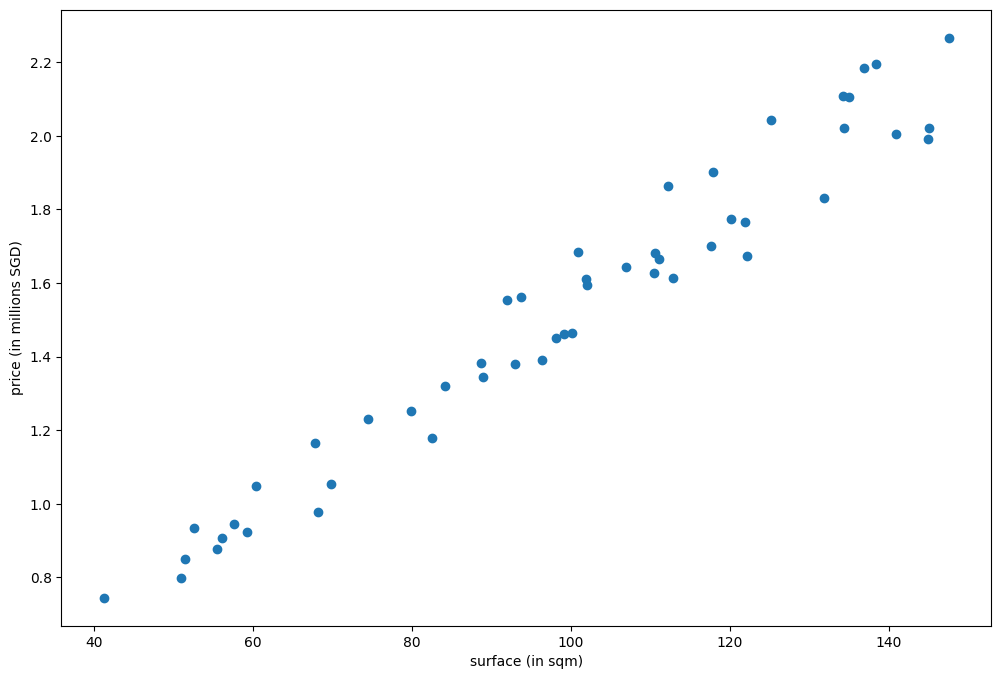

In [6]:
# Display dataset and see that there is a rather clear linear trend.
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")
plt.show()

### Linear Regression

Linear regression is a model, which assumes that there is a linear relationship between inputs $ x $ and outputs $ y $. It therefore consists of two parameters $ (a, b) $, which will connect any input $ x_i $ to its respective output $ y_i $, with the equation:

$$ y_i \approx a x_i + b $$

Below, we define the *linreg()* function, which produces a list of values to be used for display later.

In [7]:
# Linear regression has two trainable parameters (a and b).
# Other parameters, like min_surf, max_surf, n_points will
# help get points for the upcoming matplotlib displays.
def linreg(a, b, min_surf, max_surf, n_points = 50):
    return [(x, a*x + b) for x in np.linspace(min_surf, max_surf, n_points)]

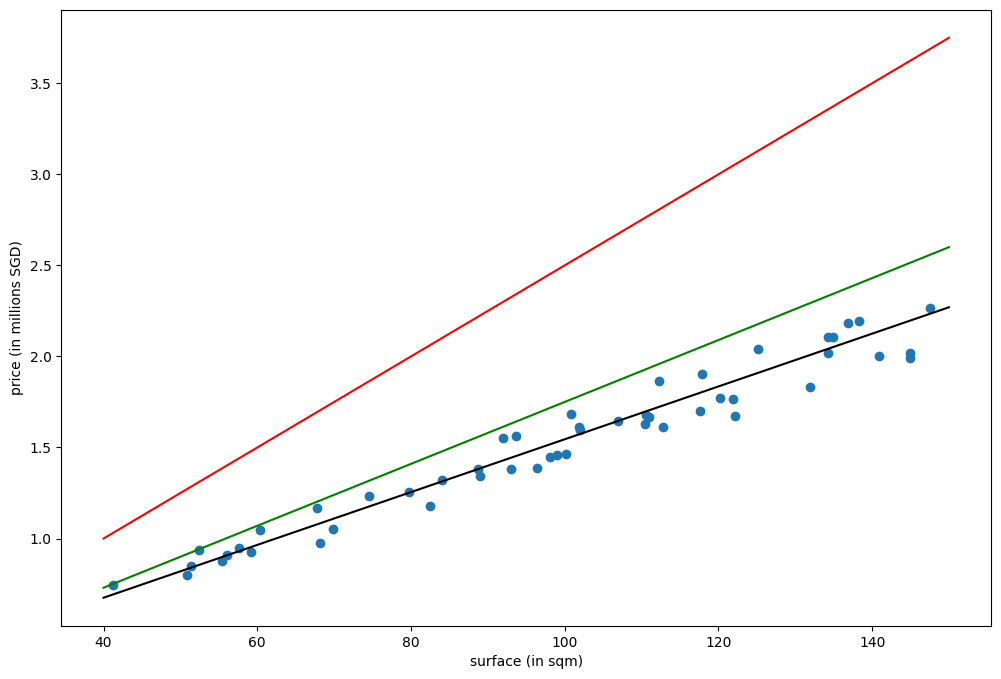

In [8]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Add some linreg
a1 = 25000/1000000
b1 = 0/1000000
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r')

# Another linreg
a2 = 17000/1000000
b2 = 50000/1000000
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g')

# A final linreg
a3 = 14500/1000000
b3 = 95000/1000000
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k')
plt.show()

### Loss function

In order to measure the quality of the parameters $ (a, b) $ used for the linear regression, we will use a loss function, namely the mean square error  $ L(a, b, x, y) $:

$$ L(a, b, x, y) = \frac{1}{N} \sum_{i=1}^N \left((a x_i + b) - y_i\right)^2 $$

With $ N $ being the number of points in the dataset (i.e. the value in the variable *n_points*).

In [9]:
# Mean square error as a loss function
# Displaying loss using exponential notation (XXXe-YYY)
def loss_mse(a, b, x, y):
    val =  sum([(y_i - (a*x_i + b))**2 for x_i, y_i in zip(x, y)])/len(x)
    return '{:.2e}'.format(val)

In [10]:
# The lower the loss function, the better the linear regression values (a, b) fit the dataset.
loss1 = loss_mse(a1, b1, inputs, outputs)
loss2 = loss_mse(a2, b2, inputs, outputs)
loss3 = loss_mse(a3, b3, inputs, outputs)
print(loss1, loss2, loss3)

1.03e+00 6.26e-02 8.29e-03


Below, we provide a full display with dataset entries, the three linear regressions and their loss values.

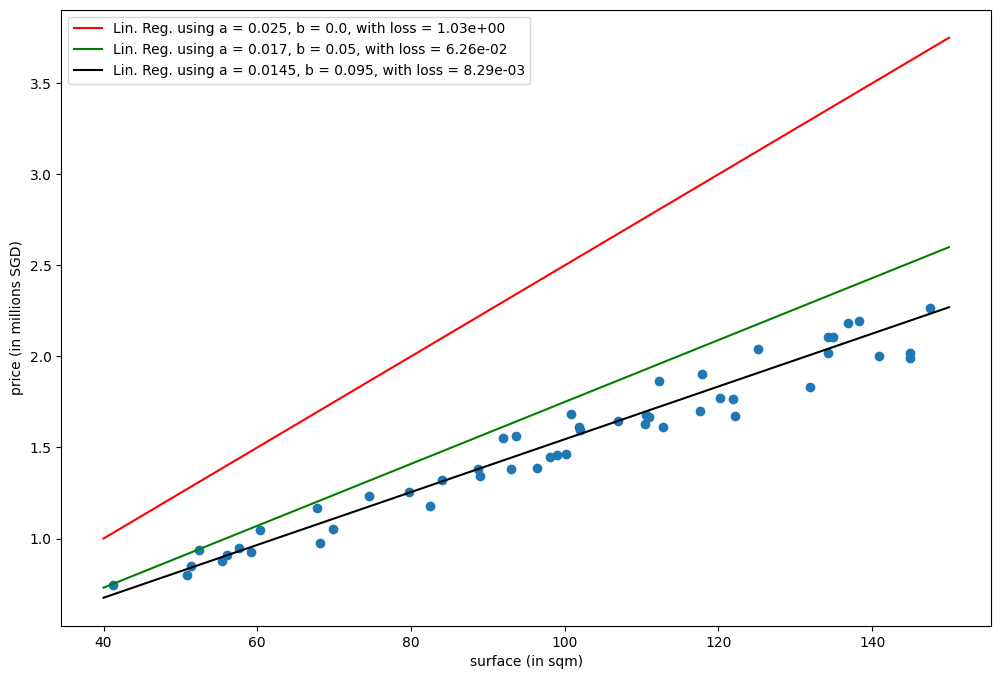

In [11]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Add some linreg
a1 = 25000/1000000
b1 = 0/1000000
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
loss1 = loss_mse(a1, b1, inputs, outputs)
legend1 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a1, b1, loss1)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r', label = legend1)

# Another linreg
a2 = 17000/1000000
b2 = 50000/1000000
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
loss2 = loss_mse(a2, b2, inputs, outputs)
legend2 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a2, b2, loss2)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g', label = legend2)

# A final linreg
a3 = 14500/1000000
b3 = 95000/1000000
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
loss3 = loss_mse(a3, b3, inputs, outputs)
legend3 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a3, b3, loss3)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k', label = legend3)

# Display
plt.legend(loc = 'best')
plt.show()

### Finding the optimal linear regression parameters, analytically

The best values $ (a^* , b^*) $ to be used for $ (a, b) $ can be found by solving the following optimization problem.

For any dataset of given inputs $ x = (x_i)_i $ and outputs $ y = (y_i)_i $, the best values $ (a^* , b^*) $ are defined as:

$$ (a^* , b^*) = \arg\min_{(a, b)} \left[ L(a, b, x, y) \right] $$

Or, equivalently:

$$ (a^* , b^*) = \arg\min_{(a, b)} \left[ \frac{1}{N} \sum_{i=1}^N \left((a x_i + b) - y_i\right)^2 \right] $$

Let us define the matrix notations, below:

$$ W = \begin{pmatrix} b \\ a \end{pmatrix}, $$

$$ X = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{pmatrix}, $$

$$ Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{pmatrix}, $$

Using these notations, we can prove that the optimal values $ (a^*, b^*) $, or equivalently $ W^* $, can be calculated as

$$ W^* = (X^T X)^{-1} X^T Y $$

In [12]:
# Defining the X matrix, following the notation above, as a numpy array.
X = np.array([[1, x_i] for x_i in inputs])
print(X)

[[  1.    52.48]
 [  1.   120.16]
 [  1.   117.84]
 [  1.   111.01]
 [  1.   117.66]
 [  1.    68.16]
 [  1.    50.86]
 [  1.   110.49]
 [  1.    60.4 ]
 [  1.    69.8 ]
 [  1.   144.99]
 [  1.   122.2 ]
 [  1.   134.25]
 [  1.   100.83]
 [  1.    96.39]
 [  1.    99.06]
 [  1.    41.17]
 [  1.   112.21]
 [  1.   121.94]
 [  1.    79.8 ]
 [  1.   100.16]
 [  1.    59.21]
 [  1.    55.42]
 [  1.    91.91]
 [  1.    56.01]
 [  1.    98.04]
 [  1.    57.56]
 [  1.    51.41]
 [  1.    82.49]
 [  1.   101.82]
 [  1.   112.81]
 [  1.   144.95]
 [  1.   136.82]
 [  1.    67.77]
 [  1.    88.92]
 [  1.   138.32]
 [  1.   125.19]
 [  1.    92.96]
 [  1.    88.72]
 [  1.   106.9 ]
 [  1.   147.58]
 [  1.   131.88]
 [  1.    93.71]
 [  1.   140.88]
 [  1.    84.07]
 [  1.   110.61]
 [  1.   101.99]
 [  1.    74.49]
 [  1.   134.29]
 [  1.   134.95]]


In [13]:
# Whiel we are at it, let us define the transposed version of X
XT = np.transpose(X)
print(XT)

[[  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.     1.     1.     1.     1.     1.     1.     1.  ]
 [ 52.48 120.16 117.84 111.01 117.66  68.16  50.86 110.49  60.4   69.8
  144.99 122.2  134.25 100.83  96.39  99.06  41.17 112.21 121.94  79.8
  100.16  59.21  55.42  91.91  56.01  98.04  57.56  51.41  82.49 101.82
  112.81 144.95 136.82  67.77  88.92 138.32 125.19  92.96  88.72 106.9
  147.58 131.88  93.71 140.88  84.07 110.61 101.99  74.49 134.29 134.95]]


In [14]:
# Defining the Y matrix, following the notation above, as a numpy array.
Y = np.array([[y_i] for y_i in outputs])
print(Y)

[[0.935365]
 [1.772784]
 [1.901195]
 [1.666587]
 [1.700371]
 [0.976882]
 [0.797843]
 [1.628048]
 [1.048909]
 [1.053269]
 [2.021069]
 [1.672687]
 [2.109117]
 [1.684086]
 [1.389638]
 [1.460845]
 [0.744834]
 [1.864293]
 [1.766388]
 [1.25355 ]
 [1.465289]
 [0.924532]
 [0.876662]
 [1.554265]
 [0.907612]
 [1.450346]
 [0.945283]
 [0.850319]
 [1.17885 ]
 [1.60976 ]
 [1.61443 ]
 [1.990804]
 [2.183792]
 [1.165802]
 [1.344189]
 [2.19417 ]
 [2.043345]
 [1.379503]
 [1.38291 ]
 [1.644736]
 [2.266497]
 [1.830034]
 [1.562736]
 [2.004551]
 [1.320158]
 [1.680886]
 [1.593864]
 [1.231054]
 [2.020608]
 [2.105278]]


In [15]:
# Defining W_star according to our formula
W_star = np.matmul(np.linalg.inv(np.matmul(XT,X)), np.matmul(XT,Y))
print(W_star)
b_star, a_star = W_star[0, 0], W_star[1, 0]
print("Optimal a_star value: ", a_star)
print("The value we used for a in the mock dataset generation: ", 14373/1000000)
print("Optimal b_star value: ", b_star)
print("The value we used for b in the mock dataset generation: ", 100000/1000000)

[[0.14344691]
 [0.01387623]]
Optimal a_star value:  0.013876226287449462
The value we used for a in the mock dataset generation:  0.014373
Optimal b_star value:  0.14344690597884088
The value we used for b in the mock dataset generation:  0.1


Finally, we provide a final display, showing the optimal linear regression model, in magenta, below.

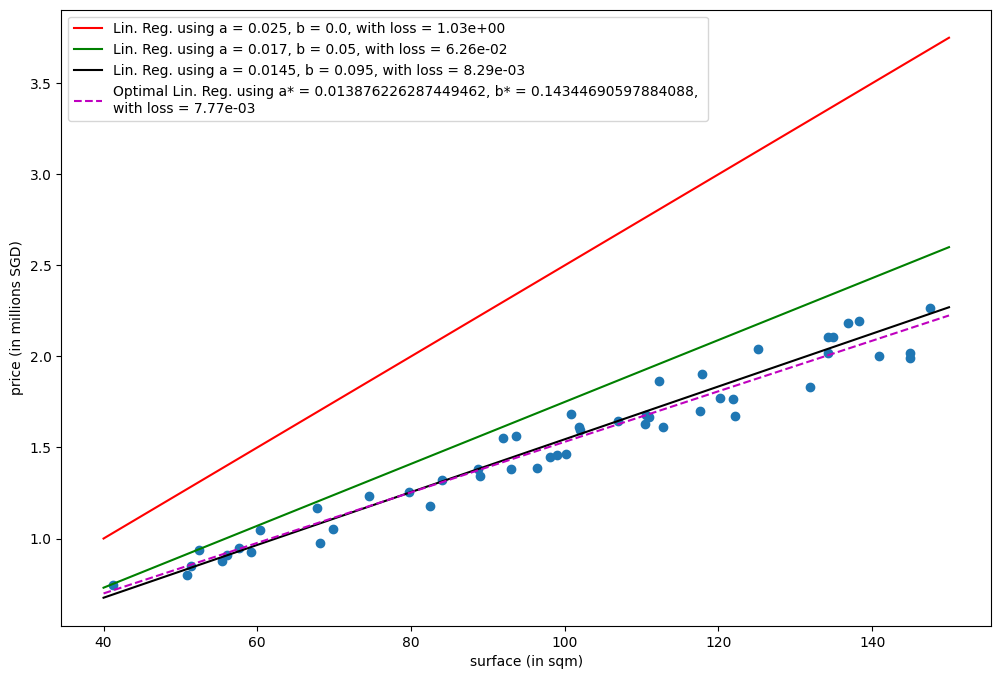

In [16]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Add some linreg
a1 = 25000/1000000
b1 = 0/1000000
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
loss1 = loss_mse(a1, b1, inputs, outputs)
legend1 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a1, b1, loss1)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r', label = legend1)

# Another linreg
a2 = 17000/1000000
b2 = 50000/1000000
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
loss2 = loss_mse(a2, b2, inputs, outputs)
legend2 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a2, b2, loss2)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g', label = legend2)

# A final linreg
a3 = 14500/1000000
b3 = 95000/1000000
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
loss3 = loss_mse(a3, b3, inputs, outputs)
legend3 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a3, b3, loss3)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k', label = legend3)

# Optimal linreg
linreg_dataset4 = linreg(a_star, b_star, min_surf, max_surf, n_points)
loss4 = loss_mse(a_star, b_star, inputs, outputs)
legend4 = "Optimal Lin. Reg. using a* = {}, b* = {}, \nwith loss = {}".format(a_star, b_star, loss4)
plt.plot(get_x_list(linreg_dataset4), get_y_list(linreg_dataset4), 'm--', label = legend4)

# Display
plt.legend(loc = 'best')
plt.show()